## The third In-class-exercise (9/29/2021, 40 points in total)

The purpose of this exercise is to understand text representation.

Question 1 (10 points): Describe an interesting text classification or text mining task and explain what kind of features might be useful for you to build the machine learning model. List your features and explain why these features might be helpful. You need to list at least five different types of features.

In [ ]:
# Your answer here (no code for this question, write down your answer as detail as possible for the above questions):

'''
Please write you answer here:

In Text Classification Workflow, one of the steps is a feature engineering. 
In this step, raw data will be cleaned and transformed into feature vectores. 
In addiction, the new features will be created using prior dataset. 
Word level feature and sentence-level features are the features that is useful to you the SVM and Naive Bayes machine learning models.
The features are: TF-IDF (TF-IDF, IDF, N-gram) & (POS tagging, systax analysis)

- TF-IDF: using "Term frequency" and calculated by multiplying 2 metrics: term frequency and inverse document frequency.
- POS tagging: describe the characteristic structure of lexical terms within a sentence or text.
- Word2vec: group the vectors of similar words together.

'''

Question 2 (20 points): Write python code to extract these features you discussed above. You can collect a few sample text data for the feature extraction. 

In [3]:
# You code here (Please add comments in the code):

listofsen = ['Don’t be buffaloed by experts and elites.','Experts often possess more data than judgment.','Elites can become so inbred that they produce hemophiliacs who bleed to death as soon as they are nicked by the real world']


In [4]:
import pandas as pd

data = pd.DataFrame(listofsen, columns = ['sentence'])
data

,sentence
0,Don’t be buffaloed by experts and elites.
1,Experts often possess more data than judgment.
2,Elites can become so inbred that they produce ...


In [5]:
# Removing Punctuation
data['sentence'] = data['sentence'].str.replace('[^\w\s]','')
data

<ipython-input-5-28c7fdde95ed>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  data['sentence'] = data['sentence'].str.replace('[^\w\s]','')


,sentence
0,Dont be buffaloed by experts and elites
1,Experts often possess more data than judgment
2,Elites can become so inbred that they produce ...


In [8]:
# Bag of words
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

sentence1 = data['sentence'][1]
sentence2 = data['sentence'][2]

bagOfWords1 = sentence1.split(' ')
bagOfWords2 = sentence2.split(' ')

uniqueWords = set(bagOfWords1).union(set(bagOfWords2))
print(uniqueWords)

numOfWords1 = dict.fromkeys(uniqueWords, 0)
for word in bagOfWords1:
    numOfWords1[word] += 1

numOfWords2 = dict.fromkeys(uniqueWords, 0)
for word in bagOfWords2:
    numOfWords2[word] += 1

print(numOfWords1)
print(numOfWords2)



{'produce', 'they', 'can', 'so', 'hemophiliacs', 'who', 'are', 'real', 'world', 'than', 'to', 'more', 'Elites', 'bleed', 'the', 'death', 'possess', 'inbred', 'soon', 'that', 'nicked', 'often', 'by', 'data', 'as', 'judgment', 'Experts', 'become'}
{'produce': 0, 'they': 0, 'can': 0, 'so': 0, 'hemophiliacs': 0, 'who': 0, 'are': 0, 'real': 0, 'world': 0, 'than': 1, 'to': 0, 'more': 1, 'Elites': 0, 'bleed': 0, 'the': 0, 'death': 0, 'possess': 1, 'inbred': 0, 'soon': 0, 'that': 0, 'nicked': 0, 'often': 1, 'by': 0, 'data': 1, 'as': 0, 'judgment': 1, 'Experts': 1, 'become': 0}
{'produce': 1, 'they': 2, 'can': 1, 'so': 1, 'hemophiliacs': 1, 'who': 1, 'are': 1, 'real': 1, 'world': 1, 'than': 0, 'to': 1, 'more': 0, 'Elites': 1, 'bleed': 1, 'the': 1, 'death': 1, 'possess': 0, 'inbred': 1, 'soon': 1, 'that': 1, 'nicked': 1, 'often': 0, 'by': 1, 'data': 0, 'as': 2, 'judgment': 0, 'Experts': 0, 'become': 1}


In [13]:
from nltk.corpus import stopwords
stopwords.words('english')

#Term Frequency (TF)
def computeTF(wordDict, bagOfWords):
    tfDict = {}
    bagOfWordsCount = len(bagOfWords)
    for word, count in wordDict.items():
        tfDict[word] = count / float(bagOfWordsCount)
    return tfDict

tf1 = computeTF(numOfWords1, bagOfWords1)
tf1
#tf2 = computeTF(numOfWords2, bagOfWords2)


{'produce': 0.0,
 'they': 0.0,
 'can': 0.0,
 'so': 0.0,
 'hemophiliacs': 0.0,
 'who': 0.0,
 'are': 0.0,
 'real': 0.0,
 'world': 0.0,
 'than': 0.14285714285714285,
 'to': 0.0,
 'more': 0.14285714285714285,
 'Elites': 0.0,
 'bleed': 0.0,
 'the': 0.0,
 'death': 0.0,
 'possess': 0.14285714285714285,
 'inbred': 0.0,
 'soon': 0.0,
 'that': 0.0,
 'nicked': 0.0,
 'often': 0.14285714285714285,
 'by': 0.0,
 'data': 0.14285714285714285,
 'as': 0.0,
 'judgment': 0.14285714285714285,
 'Experts': 0.14285714285714285,
 'become': 0.0}

In [14]:
#Inverse Data Frequency (IDF)
def computeIDF(documents):
    import math
    N = len(documents)
    
    idfDict = dict.fromkeys(documents[0].keys(), 0)
    for document in documents:
        for word, val in document.items():
            if val > 0:
                idfDict[word] += 1    
    for word, val in idfDict.items():
        idfDict[word] = math.log(N / float(val))
    return idfDict

idfs = computeIDF([numOfWords1, numOfWords2])

def computeTFIDF(tfBagOfWords, idfs):
    tfidf = {}
    for word, val in tfBagOfWords.items():
        tfidf[word] = val * idfs[word]
    return tfidf

tfidf1 = computeTFIDF(tf1, idfs)
tfidf2 = computeTFIDF(tf2, idfs)
df = pd.DataFrame([tfidf1, tfidf2])
df


,produce,they,can,so,hemophiliacs,who,are,real,world,than,...,soon,that,nicked,often,by,data,as,judgment,Experts,become
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.099021,...,0.000000,0.000000,0.000000,0.099021,0.000000,0.099021,0.000000,0.099021,0.099021,0.000000
1,0.030137,0.060274,0.030137,0.030137,0.030137,0.030137,0.030137,0.030137,0.030137,0.000000,...,0.030137,0.030137,0.030137,0.000000,0.030137,0.000000,0.060274,0.000000,0.000000,0.030137


In [16]:
# POS-tagging
!python -m spacy download en_core_web_sm


[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [17]:
import re
import unicodedata
import nltk
from nltk.corpus import stopwords
import en_core_web_sm
from textblob import Word
import spacy
nlp = spacy.load("en_core_web_sm")
#import en_core_web_s
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
# add appropriate words that will be ignored in the analysis
ADDITIONAL_STOPWORDS = ['covfefe']

def basic_clean(text):
    wnl = nltk.stem.WordNetLemmatizer()
    stopwords = nltk.corpus.stopwords.words('english') + ADDITIONAL_STOPWORDS
    text = (unicodedata.normalize('NFKD', text)
    .encode('ascii', 'ignore')
    .decode('utf-8', 'ignore')
    .lower())
    words = re.sub(r'[^\w\s]', '', text).split()
    return [wnl.lemmatize(word) for word in words if word not in stopwords]


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ttp0037\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ttp0037\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ttp0037\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [18]:
words = basic_clean(''.join(str(data['sentence'].tolist())))

In [19]:
# load english language model
nlp = spacy.load('en_core_web_sm',disable=['ner','textcat'])
nlp = en_core_web_sm.load()

# create spacy 
doc = nlp(str(words))
noun = 0
verb = 0
adj = 0
adv = 0
for token in doc:
    print(token.text,'->',token.pos_)
    if token.pos_ == 'NOUN':
      noun = noun+1
    elif token.pos_ == 'VERB':
      verb = verb+1
    elif token.pos_ == 'ADJ':
      adj = adj+1
    elif token.pos_ == 'ADV':
      adv = adv+1
    else:
      pass
print("The total nouns: ", noun)
print("The total verbs: ", verb)
print("The total adjectives: ", adj)
print("The total adverbs: ", adv)

[ -> PUNCT
' -> PUNCT
do -> AUX
nt -> VERB
' -> PUNCT
, -> PUNCT
' -> PUNCT
buffaloed -> VERB
' -> PUNCT
, -> PUNCT
' -> PUNCT
expert -> NOUN
' -> PUNCT
, -> PUNCT
' -> PUNCT
elite -> ADJ
' -> PUNCT
, -> PUNCT
' -> PUNCT
expert -> NOUN
' -> PUNCT
, -> PUNCT
' -> PUNCT
often -> ADV
' -> PUNCT
, -> PUNCT
' -> PUNCT
posse -> NOUN
' -> PUNCT
, -> PUNCT
' -> PUNCT
data -> NOUN
' -> PUNCT
, -> PUNCT
' -> PUNCT
judgment -> NOUN
' -> PUNCT
, -> PUNCT
' -> PUNCT
elite -> ADJ
' -> PUNCT
, -> PUNCT
' -> PUNCT
become -> VERB
' -> PUNCT
, -> PUNCT
' -> PUNCT
inbred -> VERB
' -> PUNCT
, -> PUNCT
' -> PUNCT
produce -> VERB
' -> PUNCT
, -> PUNCT
' -> PUNCT
hemophiliac -> NOUN
' -> PUNCT
, -> PUNCT
' -> PUNCT
bleed -> VERB
' -> PUNCT
, -> PUNCT
' -> PUNCT
death -> NOUN
' -> PUNCT
, -> PUNCT
' -> PUNCT
soon -> ADV
' -> PUNCT
, -> PUNCT
' -> PUNCT
nicked -> VERB
' -> PUNCT
, -> PUNCT
' -> PUNCT
real -> ADJ
' -> PUNCT
, -> PUNCT
' -> PUNCT
world -> NOUN
' -> PUNCT
] -> PUNCT
The total nouns:  8
The total 

In [32]:
# Word2vec features
from sklearn.feature_extraction.text import CountVectorizer
vectorizer=CountVectorizer()
data_corpus=['Data are becoming the new raw material of business.']
vocabulary=vectorizer.fit(data_corpus)
X= vectorizer.transform(data_corpus)
print(X.toarray())
print(vocabulary.get_feature_names())

[[1 1 1 1 1 1 1 1 1]]
['are', 'becoming', 'business', 'data', 'material', 'new', 'of', 'raw', 'the']


Question 3 (10 points): Use any of the feature selection methods mentioned in this paper "Deng, X., Li, Y., Weng, J., & Zhang, J. (2019). Feature selection for text classification: A review. Multimedia Tools & Applications, 78(3)." Select the most important features you extracted above, rank the features based on their importance in the descending order. 

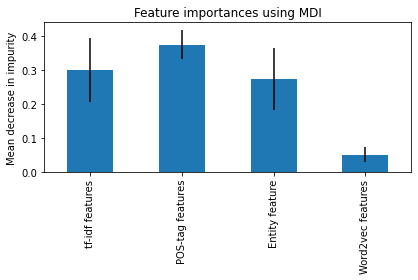

In [35]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
# Data generation and model fitting
X, y = make_classification(
    n_samples=1000, n_features=4, n_informative=3, n_redundant=0,
    n_repeated=0, n_classes=2, random_state=0, shuffle=False)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, random_state=42)
from sklearn.ensemble import RandomForestClassifier

feature_names = [
"tf-idf features", 
"POS-tag features",
"Entity feature",
"Word2vec features"]

forest = RandomForestClassifier(random_state=0)
forest.fit(X_train, y_train)

# Feature importance based on mean decrease in impurity
import time
import numpy as np

start_time = time.time()
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
elapsed_time = time.time() - start_time

# print(f"Elapsed time to compute the importances: "f"{elapsed_time:.3f} seconds")
# plot the impurity-based importance
import pandas as pd
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()